# Check Darcy/Forcheimer source terms in VDF/VEF

In [1]:
from trustutils import run
run.introduction("Pierre LEDAC (CS)")

## Introduction 
 Validation made by : Pierre LEDAC (CS)



 Report generated 26/01/2022

### Description

Solve a Darcy flow in a conic geometry. \
Velocity field (0.2m/s) is imposed at the inlet (smallest area). \
Pressure field (0 Pa) is imposed at the outlet (buggest area). \
Solve dU/dt=-grad(P/rho)-nu.U/K-Cf.U|U|/sqrt(K1) \
by using Navier Stokes equation and neglecting convection and diffusion terms. \
The first source term is Darcy term and the second one, the inertial Forchheimer term. \
See http://en.wikipedia.org/wiki/Darcy's_law \
At the convergence, we have grad(P/rho)=nu.U/K+Cf.U|U|/sqrt(K1) \
The time step is set to 0.001s and should be carefully cherry picked to avoid non convergence.

In [2]:
run.TRUST_parameters()

### TRUST parameters 
 * Version TRUST: 1.8.4
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/jupyter/pas_fini/DarcyFlow/build)

In [3]:
from trustutils import run
run.addCase(".","DarcyFlow_VDF.data")
run.addCase(".","DarcyFlow_QC_VDF.data")
run.addCase(".","DarcyFlow_VEF.data")
run.addCase(".","DarcyFlow_QC_VEF.data")
run.printCases()
run.runCases()

### Test cases 
* ./DarcyFlow_VDF.data : 
* ./DarcyFlow_QC_VDF.data : 
* ./DarcyFlow_VEF.data : 
* ./DarcyFlow_QC_VEF.data : 


Running **with Sserver**...
  => A total of 4 cases were (successfully) run in 15.3s.


## 3D results



### Pressure (Incompressible model, VDF discretisation)

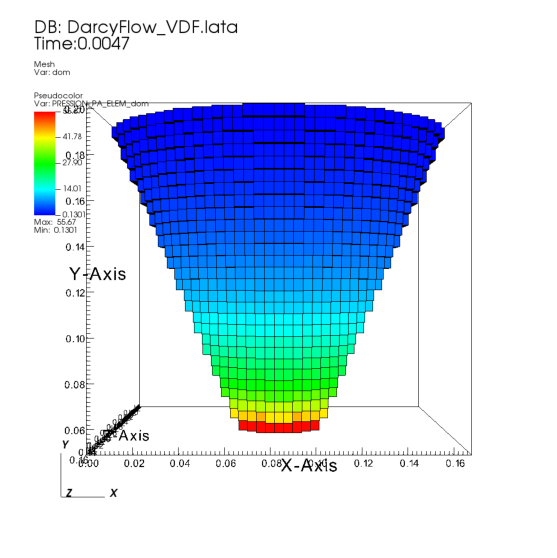

In [4]:
from trustutils import visit 
visit.showField("./DarcyFlow_VDF.lata","Pseudocolor","PRESSION_PA_ELEM_dom")

### Pressure (Quasi compressible model, VDF discretisation)

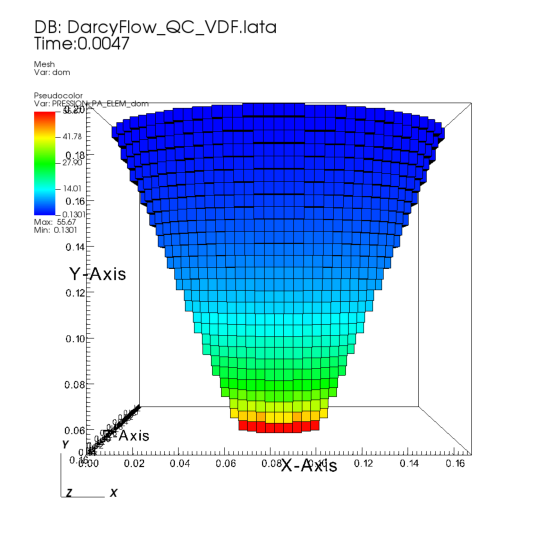

In [5]:
from trustutils import visit 
visit.showField("./DarcyFlow_QC_VDF.lata","Pseudocolor","PRESSION_PA_ELEM_dom") 

### Pressure (Incompressible model, VEF discretisation)

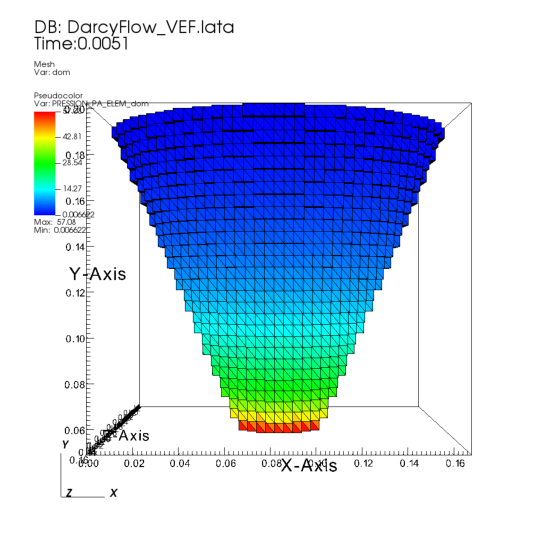

In [6]:
from trustutils import visit 
visit.showField("./DarcyFlow_VEF.lata","Pseudocolor","PRESSION_PA_ELEM_dom") 

### Pressure (Quasi compressible model, VEF discretisation)

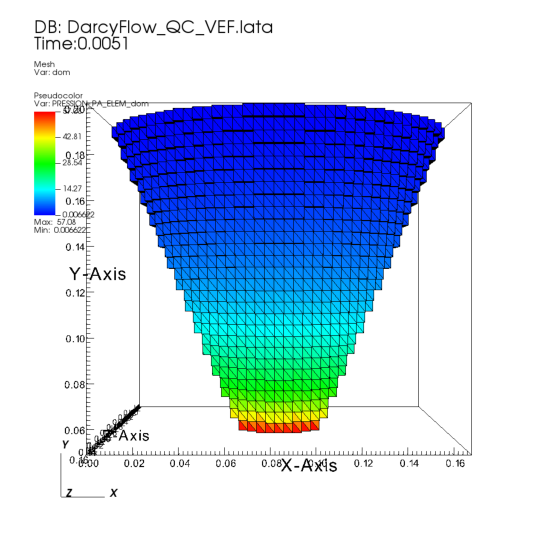

In [7]:
from trustutils import visit 
visit.showField("./DarcyFlow_QC_VEF.lata","Pseudocolor","PRESSION_PA_ELEM_dom") 

## 1D results

### Convergence of the axial velocity

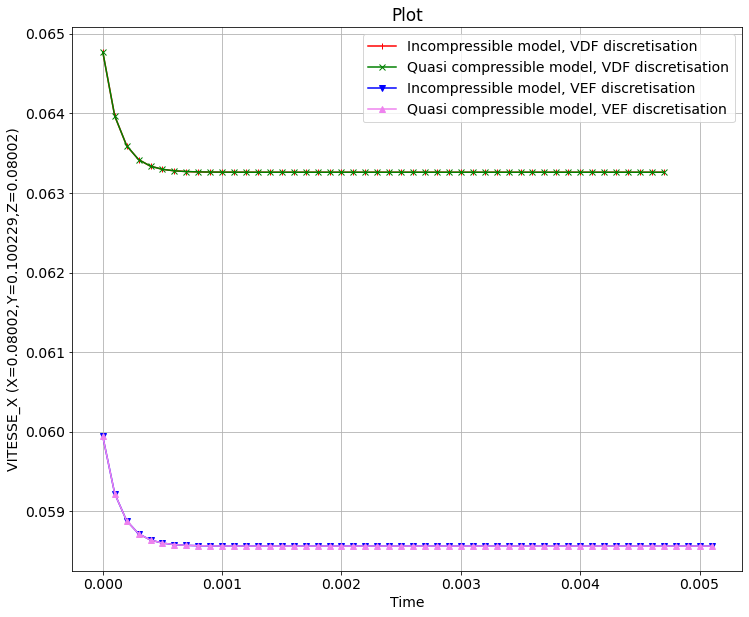

In [8]:
from trustutils.jupyter import plot

graphique=plot.Graph("Plot") 

graphique.addPoint('./DarcyFlow_VDF_SONDE_VITESSE.son'   ,marker="-|",color='r'     ,var="y" ,label="Incompressible model, VDF discretisation")
graphique.addPoint('./DarcyFlow_QC_VDF_SONDE_VITESSE.son',marker="-x",color='g'     ,var="y" ,label="Quasi compressible model, VDF discretisation")

graphique.addPoint('./DarcyFlow_VEF_SONDE_VITESSE.son'   ,marker="-v",color='b'     ,var="y",label="Incompressible model, VEF discretisation")
graphique.addPoint('./DarcyFlow_QC_VEF_SONDE_VITESSE.son',marker="-^",color='violet',var="y",label="Quasi compressible model, VEF discretisation")

### Pressure profile

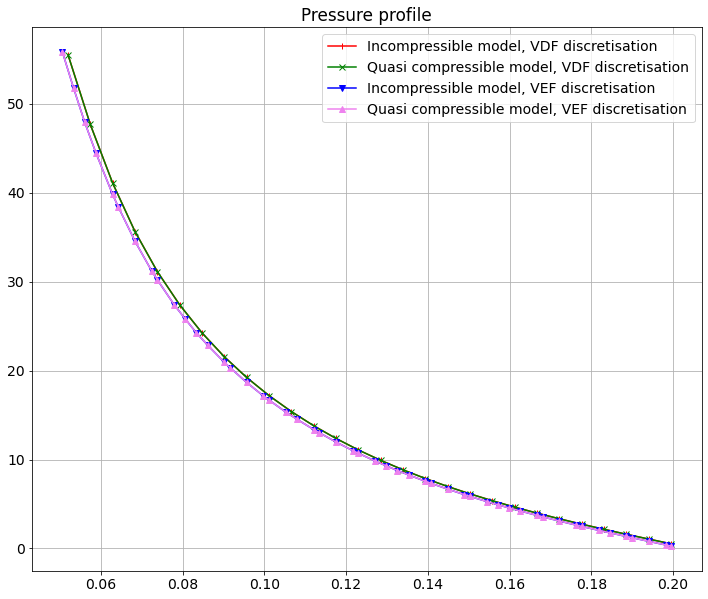

In [14]:
from trustutils import plot 

a = plot.Graph('Pressure profile')

x=plot.loadText("./DarcyFlow_VDF_SEGMENT_PRESSION.coupe")
a.add(x[0],x[1],"-|",label="Incompressible model, VDF discretisation",color='r')

x=plot.loadText("./DarcyFlow_QC_VDF_SEGMENT_PRESSION.coupe")
a.add(x[0],x[1],"-x",label="Quasi compressible model, VDF discretisation",color='g' )

x=plot.loadText("./DarcyFlow_VEF_SEGMENT_PRESSION.coupe")
a.add(x[0],x[1],"-v",label="Incompressible model, VEF discretisation",color='b' )

x=plot.loadText("./DarcyFlow_QC_VEF_SEGMENT_PRESSION.coupe")
a.add(x[0],x[1],"-^",label="Quasi compressible model, VEF discretisation",color='violet')



## Conclusion

I) Isotherm flow has been specified for the quasi compressible model \
so the results should match whith the incompressible model. \
II) The more refined the mesh, the smaller the VDF/VEF differences for pressure and velocity fields.


## Data Files

### DarcyFlow_VDF

In [10]:
from trustutils import run 
run.dumpDataset("./DarcyFlow_VDF.data") 

 # Darcy/Forcheimer source terms #
 # PARALLEL OK 8 #
 
 dimension 3
 Pb_hydraulique pb
 domaine dom
 
 # BEGIN MESH #
 Read_file dom conic_Pb1.geom
 # END MESH #
 # BEGIN PARTITION
 Partition dom
 {
 	 Partition_tool metis { Nb_parts 2 }
 	 Larg_joint 2
 	 zones_name DOM
 }
 End
 END PARTITION #
 
 # BEGIN SCATTER
 Scatter DOM.Zones dom
 END SCATTER #
 
 VDF dis
 Scheme_euler_explicit sch
 Read sch
 {
         tinit 0.0
         tmax 10
         dt_min 0.0001
         dt_max 0.0001
         dt_impr 1.e-20
         dt_sauv 100
         seuil_statio 1.e-10
 }
 
 Fluide_Incompressible fluide
 Read fluide
 {
         mu Champ_Uniforme 1 1.33e-5
         rho Champ_Uniforme 1 1.293
         lambda Champ_Uniforme 1 0.0271 
         Cp Champ_Uniforme 1 1006.8
         beta_th Champ_Uniforme 1 3.23e-3
 }
 
 Champ_Uniforme gravite
 Read gravite 3 0 -9.81 0.
 
 Associate fluide gravite
 Associate pb dom
 Associate pb sch
 Associate pb fluide
 Discretize pb dis
 
 # Solve dU/dt=-grad(P*)-nu.U/K-C

### DarcyFlow_QC_VDF

In [11]:
from trustutils import run 
run.dumpDataset("./DarcyFlow_QC_VDF.data") 

 # Darcy/Forcheimer source terms (quasi compressible model) #
 # Isotherm in order to have the same results than the incompressible model #
 # PARALLEL OK #
 dimension 3
 domaine dom 
 # BEGIN MESH #
 Read_file dom conic_Pb1.geom
 # END MESH #
 # BEGIN PARTITION 
 Partition dom 
   { 
     Partition_tool metis { Nb_parts 2 } 
     Larg_joint 2 
     zones_name DOM 
   } 
 End 
 END PARTITION #
 # BEGIN SCATTER 
 Scatter DOM.Zones dom 
 END SCATTER #
 
 VDF dis 
 Scheme_euler_explicit sch 
 Read sch
   { 
     tinit 0.0
     tmax 10.0
     dt_min 0.0001
     dt_max 0.0001
     dt_sauv 100.0
     dt_impr 0.001
     seuil_statio 1e-10
   }
 Champ_uniforme gravite 
 Read gravite 3 0.0 -9.81 0.0
 Fluide_quasi_compressible fluide 
 Read fluide
 { 
 	 pression 111582.205714
 	 loi_etat gaz_parfait_QC 
 	 { 
 	 	 Cp 1006.8
 	 	 gamma 1.4
 	 	 Prandtl 0.494112177122
 	 	 rho_constant_pour_debug champ_uniforme 1 1.293
 	 }
 	 traitement_pth constant
 	 traitement_rho_gravite moins_rho_moyen
 	 m

### DarcyFlow_VEF

In [12]:
from trustutils import run 
run.dumpDataset("./DarcyFlow_VEF.data") 

 # Darcy/Forcheimer source terms #
 # PARALLEL OK 8 #
 
 dimension 3
 Pb_hydraulique pb
 domaine dom
 
 # BEGIN MESH #
 Read_file dom conic_Pb1.geom
 Tetraedriser dom VerifierCoin dom { }
 # END MESH #
 # BEGIN PARTITION
 Partition dom
 {
 	 Partition_tool metis { Nb_parts 2 }
 	 Larg_joint 2
 	 zones_name DOM
 }
 End
 END PARTITION #
 
 # BEGIN SCATTER
 Scatter DOM.Zones dom
 END SCATTER #
 
 VEFPreP1B dis
 Scheme_euler_explicit sch
 Read sch
 {
         tinit 0.0
         tmax 10
         dt_min 0.0001
         dt_max 0.0001
         dt_impr 1.e-20
         dt_sauv 100
         seuil_statio 1.e-10
 }
 
 Fluide_Incompressible fluide
 Read fluide
 {
         mu Champ_Uniforme 1 1.33e-5
         rho Champ_Uniforme 1 1.293
         lambda Champ_Uniforme 1 0.0271 
         Cp Champ_Uniforme 1 1006.8
         beta_th Champ_Uniforme 1 3.23e-3
 }
 
 Champ_Uniforme gravite
 Read gravite 3 0 -9.81 0.
 
 Associate fluide gravite
 Associate pb dom
 Associate pb sch
 Associate pb fluide
 Discreti

### DarcyFlow_QC_VEF

In [13]:
from trustutils import run 
run.dumpDataset("./DarcyFlow_QC_VEF.data") 

 # Darcy/Forcheimer source terms (quasi compressible model) #
 # Isotherm in order to have the same results than the incompressible model #
 # PARALLEL OK #
 dimension 3
 domaine dom 
 # BEGIN MESH #
 Read_file dom conic_Pb1.geom
 Tetraedriser dom VerifierCoin dom { }
 # END MESH #
 # BEGIN PARTITION 
 Partition dom 
   { 
     Partition_tool metis { Nb_parts 2 } 
     Larg_joint 2 
     zones_name DOM 
   } 
 End 
 END PARTITION #
 # BEGIN SCATTER 
 Scatter DOM.Zones dom 
 END SCATTER #
 
 VEFPreP1B dis 
 Scheme_euler_explicit sch 
 Read sch
   { 
     tinit 0.0
     tmax 10.0
     dt_min 0.0001
     dt_max 0.0001
     dt_sauv 100.0
     dt_impr 0.001
     seuil_statio 1e-10
   }
 Champ_uniforme gravite 
 Read gravite 3 0.0 -9.81 0.0
 Fluide_quasi_compressible fluide 
 Read fluide
 { 
 	 pression 111582.205714
 	 loi_etat gaz_parfait_QC 
 	 { 
 	 	 Cp 1006.8
 	 	 gamma 1.4
 	 	 Prandtl 0.494112177122
 	 	 rho_constant_pour_debug champ_uniforme 1 1.293
 	 }
 	 traitement_pth constant
 